**Задание 1.1.3**

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени. 

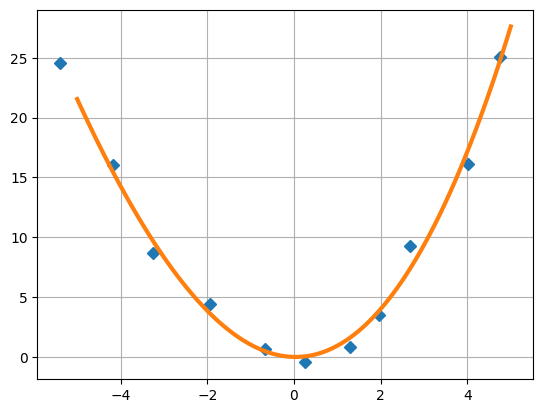

In [5]:
#Задание 1.1.3

import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5,5,101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('парабола.png')

**1.1.5 Задание**

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:  
1) 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥 
2) 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2  
3) 𝑓(𝑥,𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)  
4) 𝑓(𝑥,𝑏) = 𝑏0  𝑥^𝑏1

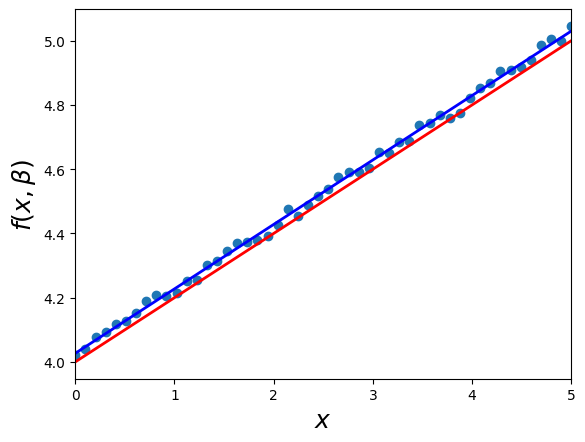

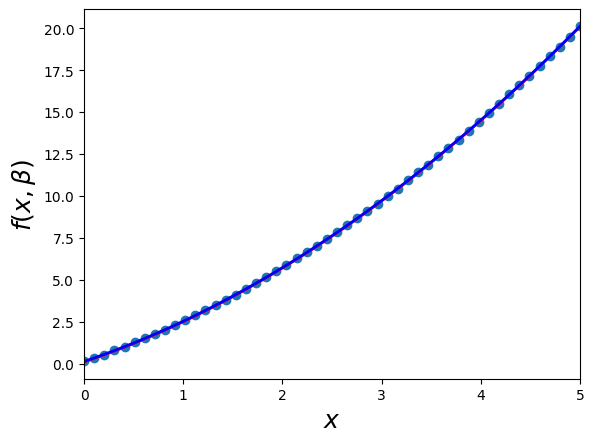

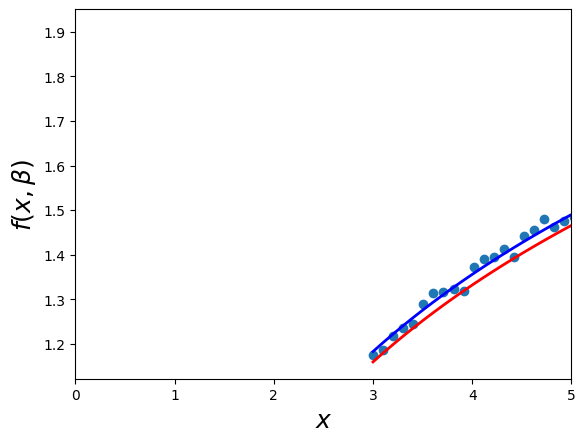

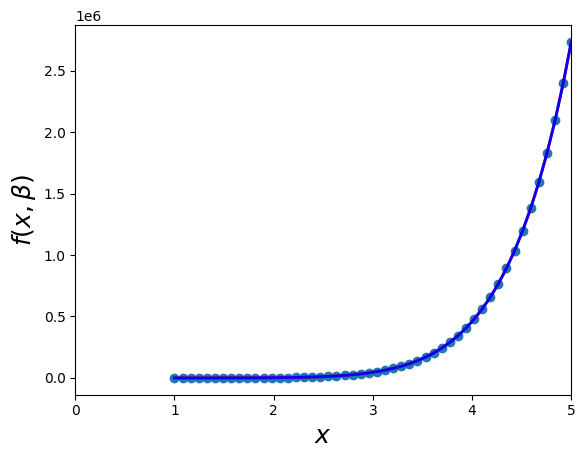

In [6]:
#1.1.5 Задание

import scipy as sp 

# 1
beta = (4, 0.2) # Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b
def f(x,b0,b1):
    return b0 + b1*x
# зададим массив из точек xi
xdata = np.linspace(0,5,50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

# 2
beta = (0.1, 2, 0.4) # Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b
def f(x,b0,b1,b2):
    return b0 + b1*x+b2*x*x
# зададим массив из точек xi
xdata = np.linspace(0,5,50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

# 3
beta = (0.5, 0.6) # Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b
def f(x,b0,b1):
    return b0 + b1*np.log(x)
# зададим массив из точек xi
xdata = np.linspace(3,10,70)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

#4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (7, 8)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив из точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

**1.2.1 Задание**

Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).  Найдите коэффициенты линии регрессии. Постройте прогноз. 

(30, 2)


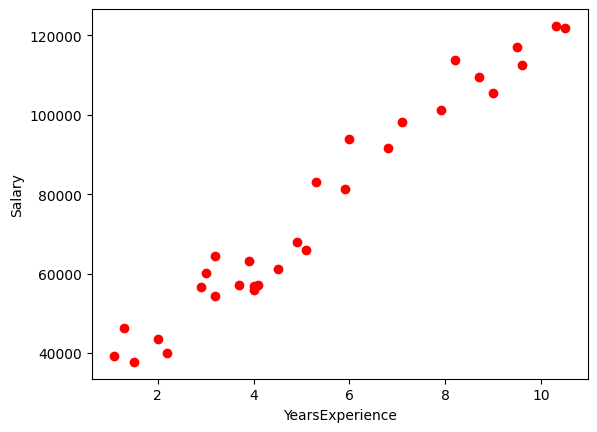

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
25825.984232150113
[9133.88237036]


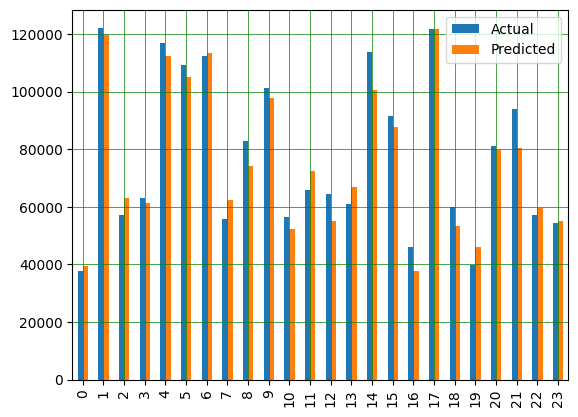

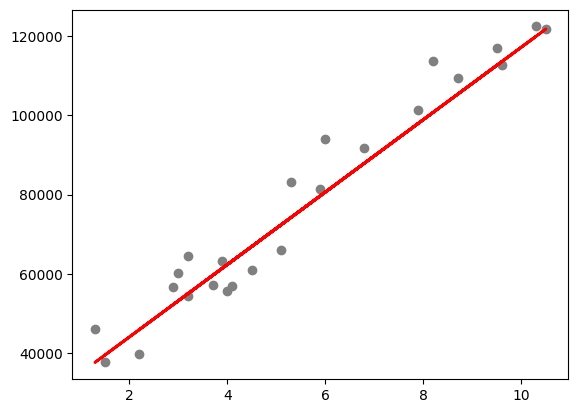

In [7]:
# 1.2.1 Задание

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)

# Исследуем набор данных
print(dataset.shape)
dataset.describe()

# Нарисуем точечную диаграмму
plt.scatter(dataset['YearsExperience'],dataset["Salary"],color = 'r',label = "Salary data ")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

# Теперь когда у нас есть атрибуты и метки, необходимо разделить их на a обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})


# визуазилируем результат сравнения в виде гистограммы
df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

# построим линию регрессии с тестовыми данными
plt.scatter(X_test,y_test,color = 'gray')
plt.plot(X_test,y_pred,color = 'red', linewidth=2)
plt.show()

**1.3.2 Задание**

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз. 
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv 
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv 

In [8]:
#1.3.2 Задание

from  sklearn import metrics

url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)
y_pred1 = regressor1.predict(X_test1)
# сравним фактические значения с прогнозируемыми
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)

y_pred2 = regressor2.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
display(df2)

print('Mean Squared Error first csv: ', metrics.mean_squared_error(y_test1, y_pred1))
print('Mean Squared Error second csv: ', metrics.mean_squared_error(y_test2, y_pred2))

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


Mean Squared Error first csv:  12823412.298126549
Mean Squared Error second csv:  12823412.298126549


**"*" Задание**

Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.  

[[1.  1. ]
 [1.2 1. ]
 [1.4 1. ]
 [1.6 1. ]
 [1.8 1. ]
 [2.  1. ]]
0.42857142857143027 3.190476190476185


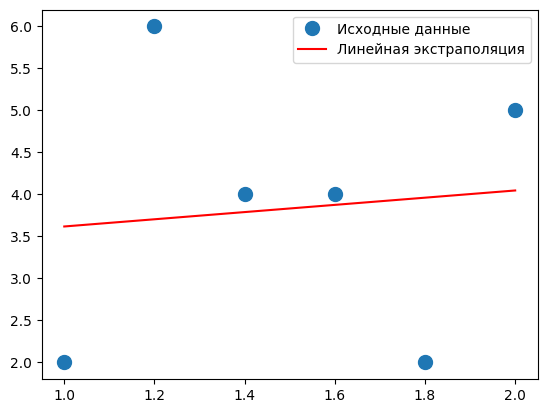

[-2.23214286  7.125      -1.57142857]


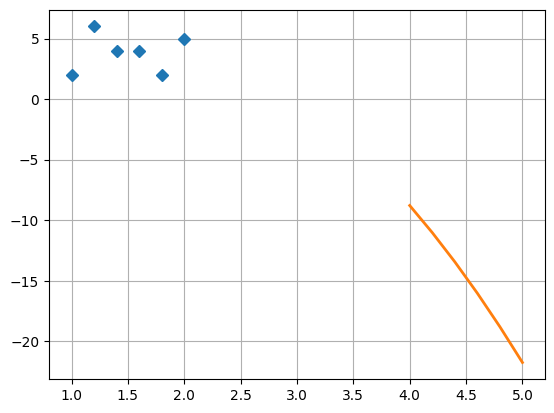

In [9]:
#ЗАДАНИЕ

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = np.array([2.0, 6.0, 4.0, 4.0, 2.0, 5.0])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(4, 5, 6)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
print(s)